In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
np.random.seed(1000)

In [59]:
file_paths = dict()
file_paths[0] = [
    "data/S11_parameter_data_for_zero_orientation.txt",
    "data/S12_parameter_data_for_zero_orientation.txt",
    "data/S21_parameter_data_for_zero_orientation.txt",
    "data/S22_parameter_data_for_zero_orientation.txt"]
file_paths[1] = [
    "data/S11_parameter_data_for_CW90_orientation.txt",
    "data/S12_parameter_data_for_CW90_orientation.txt",
    "data/S21_parameter_data_for_CW90_orientation.txt",
    "data/S22_parameter_data_for_CW90_orientation.txt"]
file_paths[2] = [
    "data/S11_parameter_data_for_CCW90_orientation.txt",
    "data/S12_parameter_data_for_CCW90_orientation.txt",
    "data/S21_parameter_data_for_CCW90_orientation.txt",
    "data/S22_parameter_data_for_CCW90_orientation.txt"]
def process_file(file_path,orientation):
    datasets = []
    with open(file_path, 'r') as file:
        current_dataset = []
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{") + 1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
        if current_dataset:
            datasets.append(current_dataset)
    data = []
    for dataset in datasets:
        permittivity_values = dataset[0]
        df_data = dataset[1:]
        s_parameter_name = file_path.split("_parameter_data_for_")[0]
        df = pd.DataFrame(df_data, columns=["Frequency", f"{s_parameter_name}_Real", f"{s_parameter_name}_Imaginary"])
        df["Orientation"] = orientation
        for key, value in permittivity_values.items():
            if "er1" in key or "er11" in key:
                df[key] = value
        data.append(df)
    return data
all_combined_data = []
for index in file_paths:
    for file in file_paths[index]:
        combined_data = process_file(file,index)
        combined_data = pd.concat(combined_data, ignore_index=True)
        all_combined_data.append(combined_data)
array = []
group_size = 4
for i in range(0, len(all_combined_data), group_size):
    combined_dataframe = pd.concat(all_combined_data[i:i+group_size], axis=1)
    combined_dataframe.reset_index(drop=True, inplace=True)
    combined_dataframe = combined_dataframe.T.drop_duplicates().T
    array.append(combined_dataframe)
training_dataframe = pd.concat(array, axis=0)
training_dataframe.reset_index(drop=True, inplace=True)

In [60]:
training_dataframe

,Frequency,data/S11_Real,data/S11_Imaginary,Orientation,er1,er11,data/S12_Real,data/S12_Imaginary,data/S21_Real,data/S21_Imaginary,data/S22_Real,data/S22_Imaginary
0,1.0000000000000,0.010708443820477,-0.0015462124720216,0,2.2609046534204,0.04505415985025,0.21881759166718,0.96427410840988,0.21881757676601,0.96427404880524,0.010326976887882,-0.0032272436656058
1,1.0006999969482,0.010755277238786,-0.0017734571592882,0,2.2609046534204,0.04505415985025,0.23742462694645,0.96046137809753,0.23742462694645,0.96046137809753,0.010342826135457,-0.0034419626463205
2,1.0013999938965,0.010795198380947,-0.0020041132811457,0,2.2609046534204,0.04505415985025,0.25594717264175,0.95629823207855,0.25594717264175,0.95629817247391,0.010353058576584,-0.0036560846492648
3,1.0020999908447,0.010827971622348,-0.0022378272842616,0,2.2609046534204,0.04505415985025,0.27437824010849,0.95178383588791,0.27437821030617,0.95178377628326,0.010357595048845,-0.0038695030380040
4,1.0027999877930,0.010853389278054,-0.0024742297828197,0,2.2609046534204,0.04505415985025,0.29271024465561,0.94691836833954,0.29271024465561,0.94691836833954,0.010356365703046,-0.0040821037255228
...,...,...,...,...,...,...,...,...,...,...,...,...
300295,1.6971999406815,0.017464302480221,0.029484787955880,2,6.9852127425897,0.058704470453142,-0.37308412790298,0.92124700546265,-0.37308409810066,0.92124700546265,0.033059414476156,-0.0090238293632865
300296,1.6979000568390,0.017832713201642,0.029381448403001,2,6.9852127425897,0.058704470453142,-0.36406975984573,0.92490166425705,-0.36406973004341,0.92490160465240,0.033075600862503,-0.0093423696234822
300297,1.6986000537872,0.018202131614089,0.029273869469762,2,6.9852127425897,0.058704470453142,-0.35501858592033,0.92847204208374,-0.35501858592033,0.92847204208374,0.033089775592089,-0.0096614528447390
300298,1.6993000507355,0.018572492524981,0.029161930084229,2,6.9852127425897,0.058704470453142,-0.34593132138252,0.93195778131485,-0.34593129158020,0.93195778131485,0.033101879060268,-0.0099810380488634


In [61]:
file_paths = dict()
file_paths[0] = ["data/mea_rot_0.txt"]
file_paths[1] = ["data/mea_rot_cw90.txt"]
file_paths[2] = ["data/mea_rot_ccw90.txt"]
# Function to process each file and merge datasets
def process_file(file_path,orientation):
    datasets = []
    with open(file_path, 'r') as file:
        current_dataset = []
        for line in file:
            if line.startswith("#Parameters"):
                if current_dataset:
                    datasets.append(current_dataset)
                    current_dataset = []
                params_str = line[line.index("{") + 1:line.index("}")]
                params = dict(param.split('=') for param in params_str.split(';'))
                current_dataset.append(params)
            elif line.startswith("#"):
                continue
            else:
                data = line.strip().split('\t')
                current_dataset.append(data)
        if current_dataset:
            datasets.append(current_dataset)
    dictionary = {
    0: "S11",
    1: "S21",
    2: "S12",
    3: "S22"
    }
    data = []
    for index, dataset in enumerate(datasets):
        permittivity_values = dataset[0]
        df_data = dataset[1:]
        s_parameter_name = dictionary[index]
        df = pd.DataFrame(df_data, columns=["Frequency", f"{s_parameter_name}_Real", f"{s_parameter_name}_Imaginary"])
        df["Orientation"] = orientation
        for key, value in permittivity_values.items():
            if "er1" in key or "er11" in key:
                df[key] = value
        data.append(df)
    return data
all_combined_data = []
for index in file_paths:
    for file in file_paths[index]:
        combined_data = process_file(file,index)
        all_combined_data.append(combined_data)
array = []
group_size = 4
for group in range(len(all_combined_data)):
    for i in range(0, len(all_combined_data[group]), group_size):
        combined_dataframe = pd.concat(all_combined_data[group][i:i+group_size], axis=1)
        combined_dataframe.reset_index(drop=True, inplace=True)
        combined_dataframe = combined_dataframe.T.drop_duplicates().T
        array.append(combined_dataframe)
testing_dataframe = pd.concat(array, axis=0)
testing_dataframe.reset_index(drop=True, inplace=True)

In [62]:
testing_dataframe

,Frequency,S11_Real,S11_Imaginary,Orientation,er1,er11,S21_Real,S21_Imaginary,S12_Real,S12_Imaginary,S22_Real,S22_Imaginary
0,1.0000000000000,-0.019713426000000,-0.0060391319000000,0,5,0.1,0.99841827000000,-0.021599129000000,0.99922335000000,-0.020864042000000,0.021094969000000,-0.0067798547000000
1,1.0007000000000,-0.019482541585540,-0.0063846667326036,0,5,0.1,0.99862961142762,-0.021390875332731,0.99871819006375,-0.020888964080002,0.020910906076745,-0.0072704463377855
2,1.0014000000000,-0.019137625649780,-0.0065910681665272,0,5,0.1,0.99844536227299,-0.021037567314369,0.99827064270063,-0.020941499353097,0.020691122020212,-0.0077301113670862
3,1.0021000000000,-0.018813112374285,-0.0069965346072957,0,5,0.1,0.99824771176501,-0.020766027366779,0.99820293745227,-0.020767770604437,0.020422204537027,-0.0081046434147131
4,1.0028000000000,-0.018616413134193,-0.0076122439176546,0,5,0.1,0.99826510603014,-0.020614971186886,0.99851990287783,-0.020519403197245,0.020163732147648,-0.0083827107262601
...,...,...,...,...,...,...,...,...,...,...,...,...
2998,1.6972000000000,-0.017770849542323,0.0034827950928199,2,5,0.4,0.99909602776723,-0.018632442639293,0.99876348882702,-0.018489463596691,0.018719681762641,0.0026810681577940
2999,1.6979000000000,-0.017772334058254,0.0033092577170592,2,5,0.4,0.99923689553109,-0.018743646636428,0.99903373677471,-0.018558447943861,0.018778943021434,0.0024404719087021
3000,1.6986000000000,-0.017794323627613,0.0031258551024631,2,5,0.4,0.99906327911917,-0.018750037605168,0.99925220024477,-0.018608934212033,0.018811912491949,0.0022649024415858
3001,1.6993000000000,-0.017840163546059,0.0029518221728035,2,5,0.4,0.99881621921983,-0.018651798373518,0.99918561307839,-0.018596795400205,0.018815444437992,0.0021515538569612


In [63]:
training_dataframe.columns = ['Frequency', 'S11_Real', 'S11_Imaginary', 'Orientation', 'Permittivity_Real', 'Permittivity_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']
training_dataframe = training_dataframe[['Frequency', 'Orientation', 'Permittivity_Real', 'Permittivity_Imaginary','S11_Real', 'S11_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']]
testing_dataframe.columns = ['Frequency', 'S11_Real', 'S11_Imaginary', 'Orientation', 'Permittivity_Real', 'Permittivity_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']
testing_dataframe = testing_dataframe[['Frequency', 'Orientation',  'Permittivity_Real', 'Permittivity_Imaginary','S11_Real', 'S11_Imaginary', 'S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']]

In [64]:
training_dataframe.head(5)

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000000000000,0,2.2609046534204,0.04505415985025,0.010708443820477,-0.0015462124720216,0.21881759166718,0.96427410840988,0.21881757676601,0.96427404880524,0.010326976887882,-0.0032272436656058
1,1.0006999969482,0,2.2609046534204,0.04505415985025,0.010755277238786,-0.0017734571592882,0.23742462694645,0.96046137809753,0.23742462694645,0.96046137809753,0.010342826135457,-0.0034419626463205
2,1.0013999938965,0,2.2609046534204,0.04505415985025,0.010795198380947,-0.0020041132811457,0.25594717264175,0.95629823207855,0.25594717264175,0.95629817247391,0.010353058576584,-0.0036560846492648
3,1.0020999908447,0,2.2609046534204,0.04505415985025,0.010827971622348,-0.0022378272842616,0.27437824010849,0.95178383588791,0.27437821030617,0.95178377628326,0.010357595048845,-0.0038695030380040
4,1.0027999877930,0,2.2609046534204,0.04505415985025,0.010853389278054,-0.0024742297828197,0.29271024465561,0.94691836833954,0.29271024465561,0.94691836833954,0.010356365703046,-0.0040821037255228


In [65]:
testing_dataframe.head(5)

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000000000000,0,5,0.1,-0.019713426000000,-0.0060391319000000,0.99841827000000,-0.021599129000000,0.99922335000000,-0.020864042000000,0.021094969000000,-0.0067798547000000
1,1.0007000000000,0,5,0.1,-0.019482541585540,-0.0063846667326036,0.99862961142762,-0.021390875332731,0.99871819006375,-0.020888964080002,0.020910906076745,-0.0072704463377855
2,1.0014000000000,0,5,0.1,-0.019137625649780,-0.0065910681665272,0.99844536227299,-0.021037567314369,0.99827064270063,-0.020941499353097,0.020691122020212,-0.0077301113670862
3,1.0021000000000,0,5,0.1,-0.018813112374285,-0.0069965346072957,0.99824771176501,-0.020766027366779,0.99820293745227,-0.020767770604437,0.020422204537027,-0.0081046434147131
4,1.0028000000000,0,5,0.1,-0.018616413134193,-0.0076122439176546,0.99826510603014,-0.020614971186886,0.99851990287783,-0.020519403197245,0.020163732147648,-0.0083827107262601


In [66]:
training_dataframe.dropna(inplace=True)
training_dataframe[training_dataframe.columns] = training_dataframe[training_dataframe.columns].apply(pd.to_numeric)
testing_dataframe.dropna(inplace=True)
testing_dataframe[testing_dataframe.columns] = testing_dataframe[testing_dataframe.columns].apply(pd.to_numeric)

In [67]:
training_dataframe

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000,0,2.260905,0.045054,0.010708,-0.001546,0.218818,0.964274,0.218818,0.964274,0.010327,-0.003227
1,1.0007,0,2.260905,0.045054,0.010755,-0.001773,0.237425,0.960461,0.237425,0.960461,0.010343,-0.003442
2,1.0014,0,2.260905,0.045054,0.010795,-0.002004,0.255947,0.956298,0.255947,0.956298,0.010353,-0.003656
3,1.0021,0,2.260905,0.045054,0.010828,-0.002238,0.274378,0.951784,0.274378,0.951784,0.010358,-0.003870
4,1.0028,0,2.260905,0.045054,0.010853,-0.002474,0.292710,0.946918,0.292710,0.946918,0.010356,-0.004082
...,...,...,...,...,...,...,...,...,...,...,...,...
300295,1.6972,2,6.985213,0.058704,0.017464,0.029485,-0.373084,0.921247,-0.373084,0.921247,0.033059,-0.009024
300296,1.6979,2,6.985213,0.058704,0.017833,0.029381,-0.364070,0.924902,-0.364070,0.924902,0.033076,-0.009342
300297,1.6986,2,6.985213,0.058704,0.018202,0.029274,-0.355019,0.928472,-0.355019,0.928472,0.033090,-0.009661
300298,1.6993,2,6.985213,0.058704,0.018572,0.029162,-0.345931,0.931958,-0.345931,0.931958,0.033102,-0.009981


In [68]:
testing_dataframe

,Frequency,Orientation,Permittivity_Real,Permittivity_Imaginary,S11_Real,S11_Imaginary,S12_Real,S12_Imaginary,S21_Real,S21_Imaginary,S22_Real,S22_Imaginary
0,1.0000,0,5,0.1,-0.019713,-0.006039,0.998418,-0.021599,0.999223,-0.020864,0.021095,-0.006780
1,1.0007,0,5,0.1,-0.019483,-0.006385,0.998630,-0.021391,0.998718,-0.020889,0.020911,-0.007270
2,1.0014,0,5,0.1,-0.019138,-0.006591,0.998445,-0.021038,0.998271,-0.020941,0.020691,-0.007730
3,1.0021,0,5,0.1,-0.018813,-0.006997,0.998248,-0.020766,0.998203,-0.020768,0.020422,-0.008105
4,1.0028,0,5,0.1,-0.018616,-0.007612,0.998265,-0.020615,0.998520,-0.020519,0.020164,-0.008383
...,...,...,...,...,...,...,...,...,...,...,...,...
2998,1.6972,2,5,0.4,-0.017771,0.003483,0.999096,-0.018632,0.998763,-0.018489,0.018720,0.002681
2999,1.6979,2,5,0.4,-0.017772,0.003309,0.999237,-0.018744,0.999034,-0.018558,0.018779,0.002440
3000,1.6986,2,5,0.4,-0.017794,0.003126,0.999063,-0.018750,0.999252,-0.018609,0.018812,0.002265
3001,1.6993,2,5,0.4,-0.017840,0.002952,0.998816,-0.018652,0.999186,-0.018597,0.018815,0.002152


In [69]:
#sns.pairplot(training_dataframe, diag_kind='kde') 
#plt.show()

In [70]:
#sns.pairplot(testing_dataframe, diag_kind='kde') 
#plt.show()

In [71]:
#plt.figure(figsize=(12, 6))
#sns.heatmap(training_dataframe.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
#plt.show()

In [72]:
#plt.figure(figsize=(12, 6))
#sns.heatmap(testing_dataframe.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
#plt.show()

In [73]:
X_train = training_dataframe[['Frequency','S11_Real', 'S11_Imaginary','S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']].values
y_train = training_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values
indices = np.random.permutation(len(training_dataframe))
X = X_train[indices]
y = y_train[indices]
split_point = int(0.9 * len(X))
X_train = X[:split_point]
y_train = y[:split_point]
X_val = X[split_point:]
y_val = y[split_point:]

X_test = testing_dataframe[['Frequency','S11_Real', 'S11_Imaginary','S12_Real',
       'S12_Imaginary', 'S21_Real', 'S21_Imaginary', 'S22_Real',
       'S22_Imaginary']].values
y_test = testing_dataframe[['Permittivity_Real', 'Permittivity_Imaginary']].values
y_test[y_test == 0.4] = 0.1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1280      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 2)                 34        
                                                                 
Total params: 12178 (47.57 KB)
Trainable params: 12178 (47.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/80
91/91 [==============================] - 0s 3ms/step - loss: 27.5672 - mean_absolute_error: 2.1841 - mean_squared_error: 11.3916 - val_loss: 26.1184 - val_mean_absolute_error: 2.1041 - val_mean_squared_error: 10.6697
Epoch 2/80
91/91 [==============================] - 0s 3ms/step - loss: 24.6460 - mean_absolute_error: 2.0184 - mean_squared_error: 9.9359 - val_loss: 23.3915 - val_mean_absolute_error: 1.9526 - val_mean_squared_error: 9.3110
Epoch 3/80
91/91 [==============================] - 0s 3ms/step - loss: 22.1218 - mean_absolute_error: 1.8794 - mean_squared_error: 8.6784 - val_loss: 21.0480 - val_mean_absolute_error: 1.8232 - val_mean_squared_error: 8.1438
Epoch 4/80
91/91 [==============================] - 0s 3ms/step - loss: 19.9567 - mean_absolute_error: 1.7592 - mean_squared_error: 7.6004 - val_loss: 19.0088 - val_mean_absolute_error: 1.7085 - val_mean_squared_error: 7.1288
Epoch 5/80
91/91 [==============================] - 0s 3ms/step - loss: 18.0465 - mean_absolut

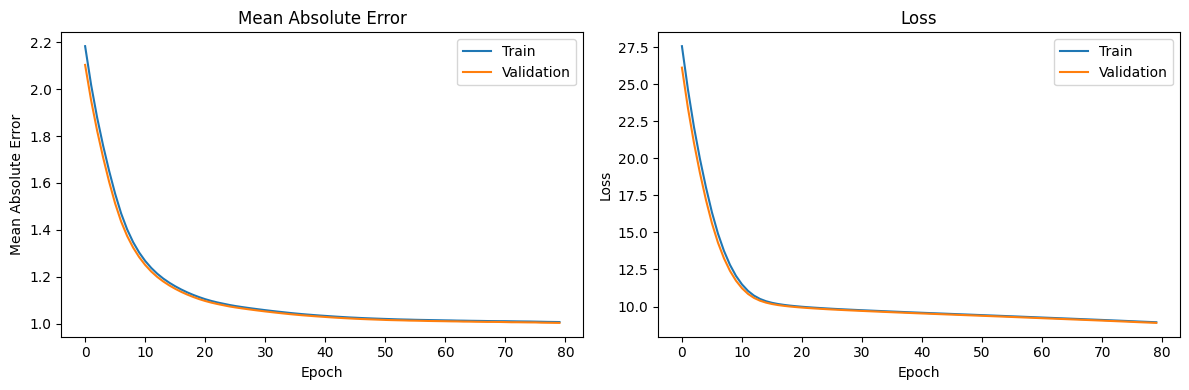

In [74]:
def mae_loss(y_true, y_pred):
    y_true_real, y_true_imag = tf.split(y_true, 2, axis=-1)
    y_pred_real, y_pred_imag = tf.split(y_pred, 2, axis=-1)
    loss_real = tf.losses.mean_squared_error(y_true_real, y_pred_real)
    loss_imag = tf.losses.mean_squared_error(y_true_imag, y_pred_imag)
    return loss_real + loss_imag
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.HeNormal()),
    keras.layers.Dense(y_train.shape[1], activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00001),
              loss=[mae_loss],
              metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanSquaredError()])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=80, batch_size=3000)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

94/94 [==============================] - 0s 953us/step


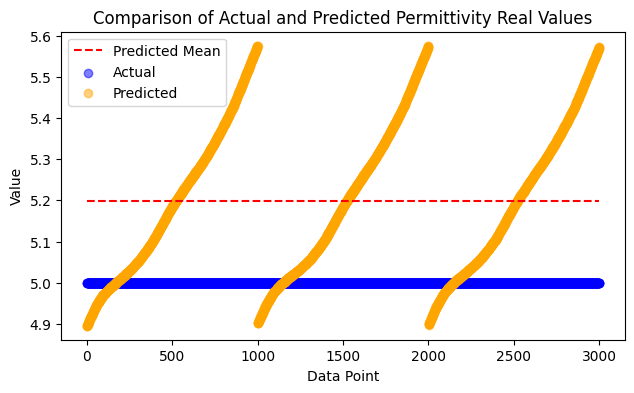

In [75]:
y_pred = model.predict(X_test)
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y_test) - 1], [np.mean(y_pred[:, 0]), np.mean(y_pred[:, 0])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y_test)), y_test[:, 0], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred[:, 0], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

94/94 [==============================] - 0s 527us/step


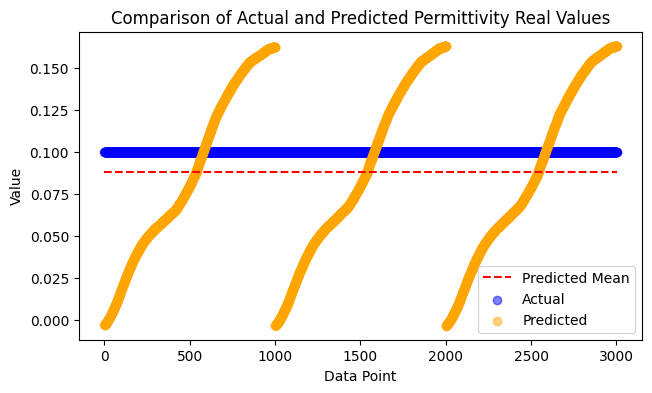

In [76]:
y_pred = model.predict(X_test)
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot([0, len(y_test) - 1], [np.mean(y_pred[:, 1]), np.mean(y_pred[:, 1])], label='Predicted Mean', color='red', linestyle='dashed')
plt.scatter(range(len(y_test)), y_test[:, 1], label='Actual', color='blue', alpha=0.5)
plt.scatter(range(len(y_test)), y_pred[:, 1], label='Predicted', color='orange', alpha=0.5)
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()